In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import seaborn as sns

## Read data

In [2]:
df = pd.read_csv('data.csv', sep=';')

## Data profiling

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

There are 4,424 complete records with 37 independent variables, encompassing demographic, socio-economic, and academic factors. There is no null value in this dataframe.

In [5]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

A crucial preprocessing step involved separating the data into numerical and categorical types. This distinction is vital for effective data analysis and machine learning model preparation, allowing for appropriate statistical methods, feature encoding, and summary measures (Garcia et al., 2015). It also aids in model selection and optimisation, as different algorithms may perform better with specific data types or require varied preprocessing approaches.

In [6]:
category_transform_cols = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
                 "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Gender", "Target"]

numeric_cols = ['Application order', 'Admission grade', 'Previous qualification (grade)', 'Age at enrollment', 'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
                'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']

category_remain_cols = list(set(df.columns) - set(category_transform_cols + numeric_cols))

## Cleansing data

The next phase involves data mapping to enhance visualisation and insight generation.

In [7]:
mapping_data = {
    'Marital status': {
        1: 'single',
        2: 'married',
        3: 'widower',
        4: 'divorced',
        5: 'facto union',
        6: 'legally separated'
    },
    'Application mode': {
        1: '1st phase - general contingent',
        2: 'Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island)',
        7: 'Holders of other higher courses 10 - Ordinance No. 854-B/99',
        15: 'International student (bachelor)',
        16: '1st phase - special contingent (Madeira Island)',
        17: '2nd phase - general contingent',
        18: '3rd phase - general contingent',
        26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
        27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
        39: 'Over 23 years old',
        42: 'Transfer',
        43: 'Change of course',
        44: 'Technological specialization diploma holders',
        51: 'Change of institution/course',
        53: 'Short cycle diploma holders',
        57: 'Change of institution/course (International)'
    },
    'Course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    # 'Daytime/evening attendance': {
    #     1: 'daytime',
    #     0: 'evening'
    # },
    'Previous qualification': {
        1: 'Secondary education',
        2: "Higher education - bachelor's degree",
        3: 'Higher education - degree',
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: "Frequency of higher education",
        9: "12th year of schooling - not completed",
        10: "11th year of schooling - not completed",
        12: "Other - 11th year of schooling",
        14: "10th year of schooling",
        15: "10th year of schooling - not completed",
        19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
        38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
        39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)",
        42: "Professional higher technical course",
        43: "Higher education - master (2nd cycle)"
    },
    'Nacionality': {
        1: 'Portuguese',
        2: 'German',
        6: 'Spanish',
        11: 'Italian',
        13: 'Dutch',
        14: 'English',
        17: 'Lithuanian',
        21: 'Angolan',
        22: 'Cape Verdean',
        24: 'Guinean',
        25: 'Mozambican',
        26: 'Santomean',
        32: 'Turkish',
        41: 'Brazilian',
        62: 'Romanian',
        100: 'Moldova (Republic of)',
        101: 'Mexican',
        103: 'Ukrainian',
        105: 'Russian',
        108: 'Cuban',
        109: 'Colombian'
    },
    "Mother's qualification": {
        1: "Secondary Education - 12th Year of Schooling or Eq.",
        2: "Higher Education - Bachelor's Degree",
        3: "Higher Education - Degree",
        4: "Higher Education - Master's",
        5: "Higher Education - Doctorate",
        6: "Frequency of Higher Education",
        9: "12th Year of Schooling - Not Completed",
        10: "11th Year of Schooling - Not Completed",
        11: "7th Year (Old)",
        12: "Other - 11th Year of Schooling",
        14: "10th Year of Schooling",
        18: "General Commerce Course",
        19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        22: "Technical-Professional Course",
        26: "7th Year of Schooling",
        27: "2nd Cycle of the General High School Course",
        29: "9th Year of Schooling - Not Completed",
        30: "8th Year of Schooling",
        34: "Unknown",
        35: "Can't Read or Write",
        36: "Can Read without Having a 4th Year of Schooling",
        37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
        39: "Technological Specialization Course",
        40: "Higher Education - Degree (1st cycle)",
        41: "Specialized Higher Studies Course",
        42: "Professional Higher Technical Course",
        43: "Higher Education - Master (2nd cycle)",
        44: "Higher Education - Doctorate (3rd cycle)"
    },
    "Father's qualification": {
        1: "Secondary Education - 12th Year of Schooling or Eq.",
        2: "Higher Education - Bachelor's Degree",
        3: "Higher Education - Degree",
        4: "Higher Education - Master's",
        5: "Higher Education - Doctorate",
        6: "Frequency of Higher Education",
        9: "12th Year of Schooling - Not Completed",
        10: "11th Year of Schooling - Not Completed",
        11: "7th Year (Old)",
        12: "Other - 11th Year of Schooling",
        13: "2nd year complementary high school course",
        14: "10th Year of Schooling",
        18: "General Commerce Course",
        19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        20: "Complementary High School Course",
        22: "Technical-Professional Course",
        25: "Complementary High School Course - Not Concluded",
        26: "7th Year of Schooling",
        27: "2nd Cycle of the General High School Course",
        29: "9th Year of Schooling - Not Completed",
        30: "8th Year of Schooling",
        31: "General Course of Administration and Commerce",
        33: "Supplementary Accounting and Administration",
        34: "Unknown",
        35: "Can't Read or Write",
        36: "Can Read without Having a 4th Year of Schooling",
        37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
        39: "Technological Specialization Course",
        40: "Higher Education - Degree (1st cycle)",
        41: "Specialized Higher Studies Course",
        42: "Professional Higher Technical Course",
        43: "Higher Education - Master (2nd cycle)",
        44: "Higher Education - Doctorate (3rd cycle)"
    },
    "Mother's occupation": {
        0: "Student",
        1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
        2: "Specialists in Intellectual and Scientific Activities",
        3: "Intermediate Level Technicians and Professions",
        4: "Administrative Staff",
        5: "Personal Services, Security and Safety Workers, and Sellers",
        6: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
        7: "Skilled Workers in Industry, Construction, and Craftsmen",
        8: "Installation and Machine Operators and Assembly Workers",
        9: "Unskilled Workers",
        10: "Armed Forces Professions",
        90: "Other Situation",
        99: "(Blank)",
        122: "Health Professionals",
        123: "Teachers",
        125: "Specialists in Information and Communication Technologies (ICT)",
        131: "Intermediate Level Science and Engineering Technicians and Professions",
        132: "Technicians and Professionals of Intermediate Level of Health",
        134: "Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services",
        141: "Office Workers, Secretaries in General, and Data Processing Operators",
        143: "Data, Accounting, Statistical, Financial Services, and Registry-Related Operators",
        144: "Other Administrative Support Staff",
        151: "Personal Service Workers",
        152: "Sellers",
        153: "Personal Care Workers and the Like",
        171: "Skilled Construction Workers and the Like, Except Electricians",
        173: "Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans, and the Like",
        175: "Workers in Food Processing, Woodworking, Clothing, and Other Industries and Crafts",
        191: "Cleaning Workers",
        192: "Unskilled Workers in Agriculture, Animal Production, Fisheries, and Forestry",
        193: "Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport",
        194: "Meal Preparation Assistants"
    },
    "Father's occupation": {
        0: "Student",
        1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
        2: "Specialists in Intellectual and Scientific Activities",
        3: "Intermediate Level Technicians and Professions",
        4: "Administrative Staff",
        5: "Personal Services, Security and Safety Workers, and Sellers",
        6: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
        7: "Skilled Workers in Industry, Construction, and Craftsmen",
        8: "Installation and Machine Operators and Assembly Workers",
        9: "Unskilled Workers",
        10: "Armed Forces Professions",
        90: "Other Situation",
        99: "(Blank)",
        101: "Armed Forces Officers",
        102: "Armed Forces Sergeants",
        103: "Other Armed Forces Personnel",
        112: "Directors of Administrative and Commercial Services",
        114: "Hotel, Catering, Trade, and Other Services Directors",
        121: "Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques",
        122: "Health Professionals",
        123: "Teachers",
        124: "Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations",
        131: "Intermediate Level Science and Engineering Technicians and Professions",
        132: "Technicians and Professionals of Intermediate Level of Health",
        134: "Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services",
        135: "Information and Communication Technology Technicians",
        141: "Office Workers, Secretaries in General, and Data Processing Operators",
        143: "Data, Accounting, Statistical, Financial Services, and Registry-Related Operators",
        144: "Other Administrative Support Staff",
        151: "Personal Service Workers",
        152: "Sellers",
        153: "Personal Care Workers and the Like",
        154: "Protection and Security Services Personnel",
        161: "Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers",
        163: "Farmers, Livestock Keepers, Fishermen, Hunters, and Gatherers, Subsistence",
        171: "Skilled Construction Workers and the Like, Except Electricians",
        172: "Skilled Workers in Metallurgy, Metalworking, and Similar",
        174: "Skilled Workers in Electricity and Electronics",
        175: "Workers in Food Processing, Woodworking, Clothing, and Other Industries and Crafts",
        181: "Fixed Plant and Machine Operators",
        182: "Assembly Workers",
        183: "Vehicle Drivers and Mobile Equipment Operators",
        192: "Unskilled Workers in Agriculture, Animal Production, Fisheries, and Forestry",
        193: "Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport",
        194: "Meal Preparation Assistants",
        195: "Street Vendors (except food) and Street Service Providers"
    },
    # "Gender": {
    #     0: "Female",
    #     1: "Male"
    # }
}

In [8]:
# Mapping data dictionary in dataframe
for col in mapping_data:
    df[col] = df[col].map(mapping_data[col])

In [9]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

To focus on students as individuals, variables related to family background, nationality, and countries' economic factors were excluded. This decision was also partly influenced by the limited number of international students in the dataset.

In [10]:
# Drop columns that related to national information: 'Inflation rate', 'GDP', 'Nacionality', 'Unemployment rate'
# And mothers/fathers column: 'Mother's qualification', 'Father's qualification', 'Mother's occupation', 'Father's occupation'
df.drop(['Inflation rate', 'GDP', 'Nacionality', 'Unemployment rate', "Mother's qualification", "Father's qualification", "Mother's occupation",
         "Father's occupation"], axis=1, inplace=True)

Upon examination of the dataset following variable reduction, data type inconsistencies were identified in the 'Curricular units 1st sem (grade)' and 'Curricular units 2nd sem (grade)' fields.

In [11]:
df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].head()

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
0,0.000000,0.000000
1,14.000000,13.666667
2,0.000000,0.000000
3,13.428571,12.400000
4,12.333333,13.000000


To fix these anomalies and ensure data integrity, these variables were converted to the float data type, and their decimal formats were standardised. This data cleaning step enhances the dataset's quality, mitigating potential risks of skewed results and facilitating more accurate analyses in subsequent research stages.

In [12]:
# 2 columns: Curricular units 2nd sem (grade), Curricular units 1st sem (grade) is in the wrong data type
def normalize_sem_grade(grade):
    try:
        grade = float(grade)
        return grade
    except:
        grade = grade.split('.')
        grade = grade[0] + '.' + grade[1][0]
        return float(grade)

df['Curricular units 1st sem (grade)'] = df['Curricular units 1st sem (grade)'].apply(normalize_sem_grade)
df['Curricular units 2nd sem (grade)'] = df['Curricular units 2nd sem (grade)'].apply(normalize_sem_grade)

In [13]:
df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].head()

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
0,0.000000,0.000000
1,14.000000,13.666667
2,0.000000,0.000000
3,13.428571,12.400000
4,12.333333,13.000000


## EDA

The analysis of the dataset revealed an imbalanced distribution among the three target categories, with "Dropout" and "Enrolled" as minority classes. These minority classes are of particular interest for targeted academic support and guidance interventions, highlighting the need for specialised techniques in addressing class imbalance during model development.

In [14]:
df.Target.value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


#### For all target

First, have a look at all remaining columns

In [15]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target'],
      dtype='object')

In [16]:
numeric_columns = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                   'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                   'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                   'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)']

Visualisation of categorical variables through bar plots exposed imbalances in factors such as "Educational special needs" and "International." Similar imbalances were observed in "Marital status" and "Previous qualification" variables. These findings suggest that some demographic variables may have limited predictive power due to their extreme imbalance, potentially influencing feature selection in subsequent modelling stages.

Debtor


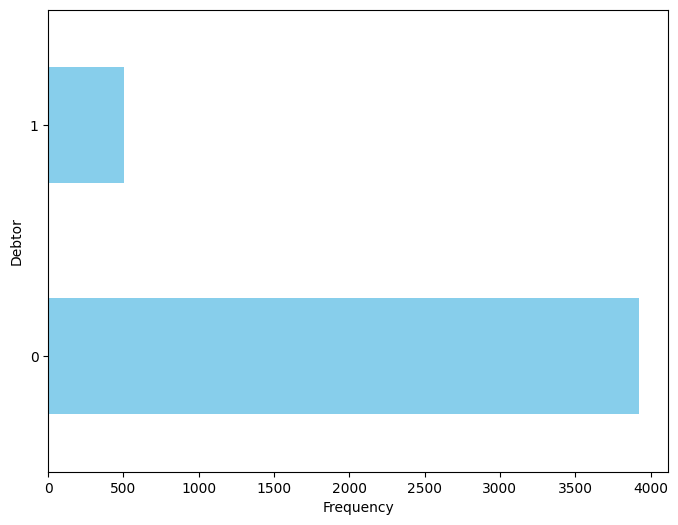

----------------------------------------------------------------------------------------------------
Educational special needs


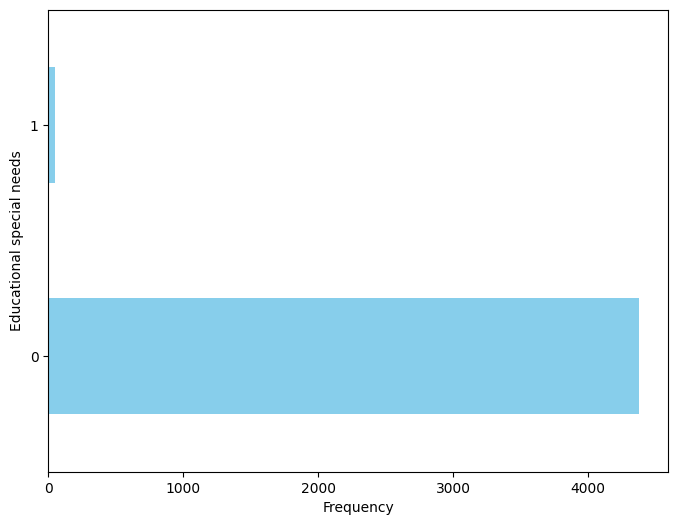

----------------------------------------------------------------------------------------------------
International


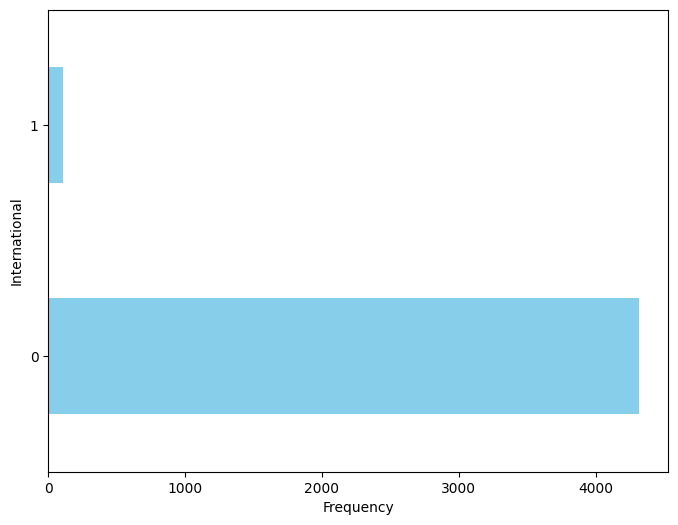

----------------------------------------------------------------------------------------------------
Displaced


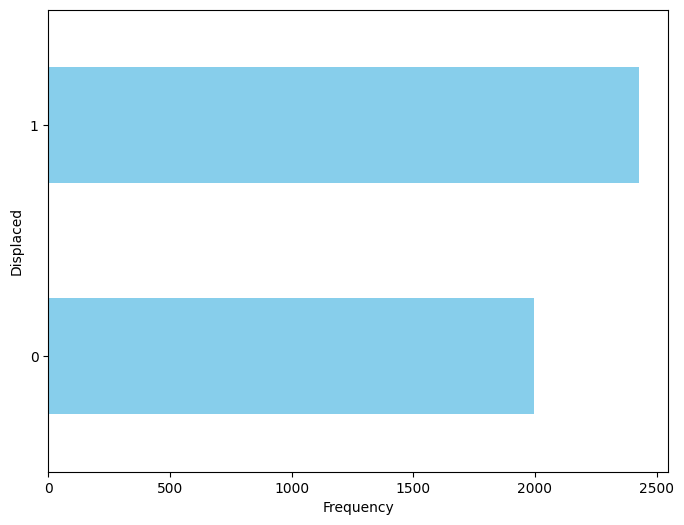

----------------------------------------------------------------------------------------------------
Daytime/evening attendance	


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


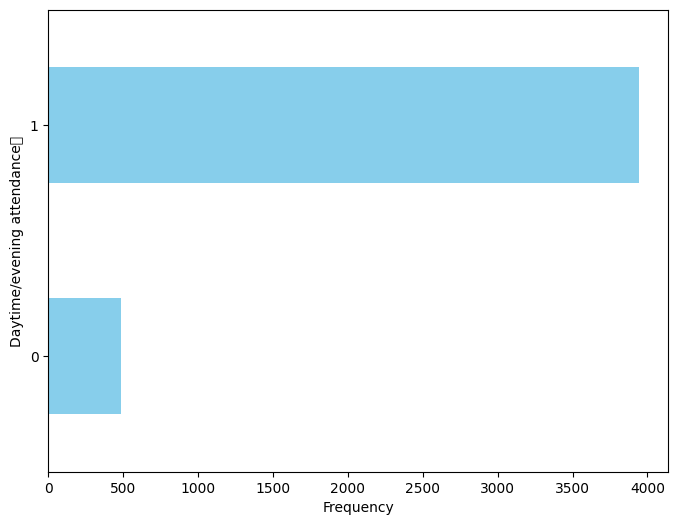

----------------------------------------------------------------------------------------------------
Scholarship holder


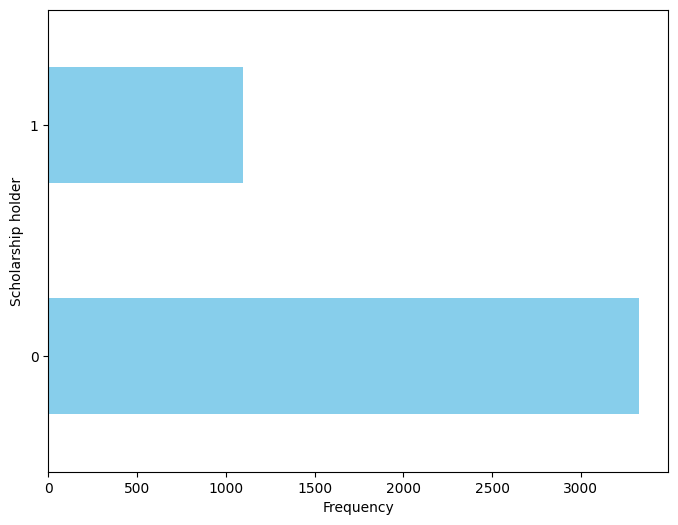

----------------------------------------------------------------------------------------------------
Tuition fees up to date


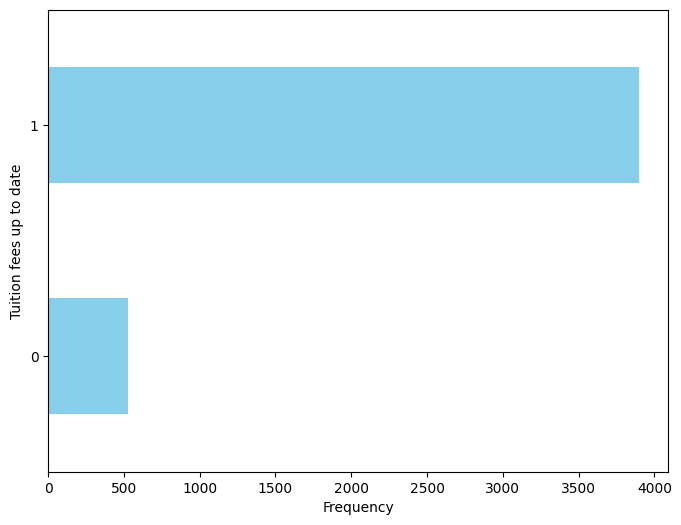

----------------------------------------------------------------------------------------------------
Gender


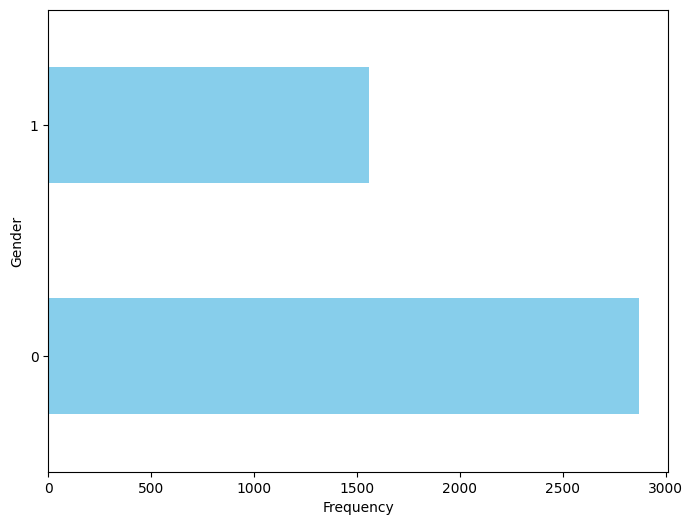

----------------------------------------------------------------------------------------------------
Application order


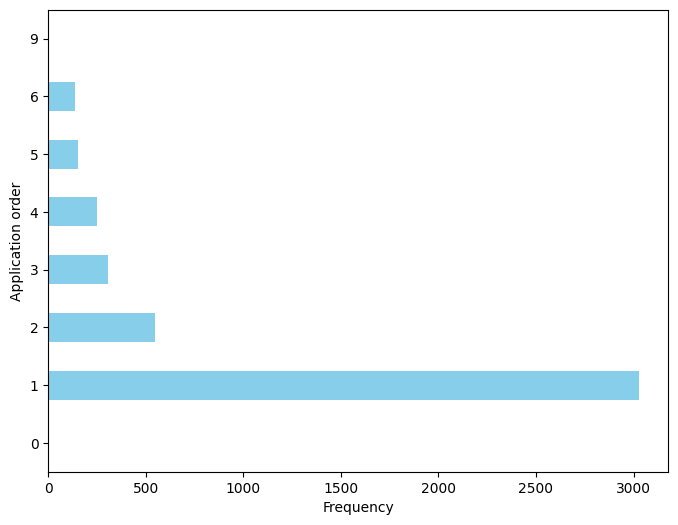

----------------------------------------------------------------------------------------------------
Marital status


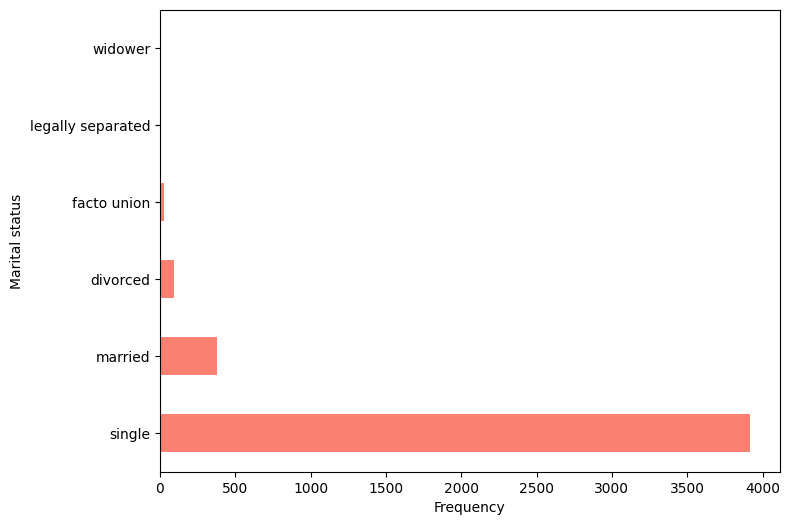

----------------------------------------------------------------------------------------------------
Application mode


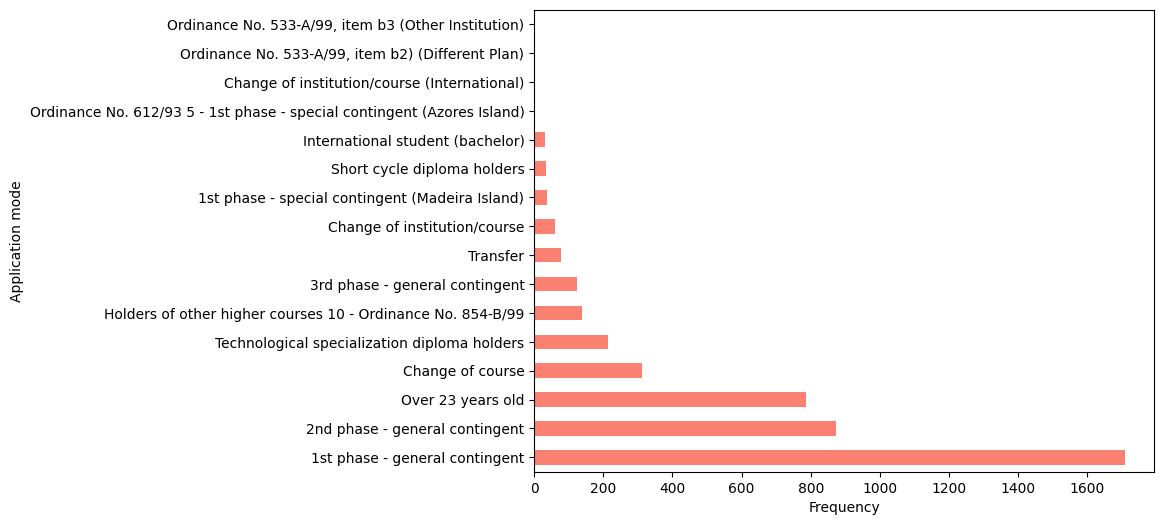

----------------------------------------------------------------------------------------------------
Course


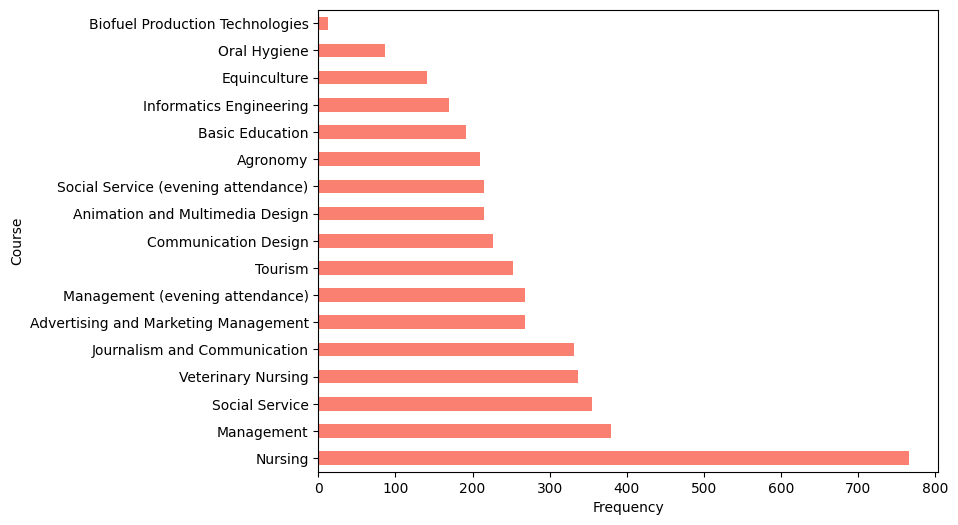

----------------------------------------------------------------------------------------------------
Previous qualification


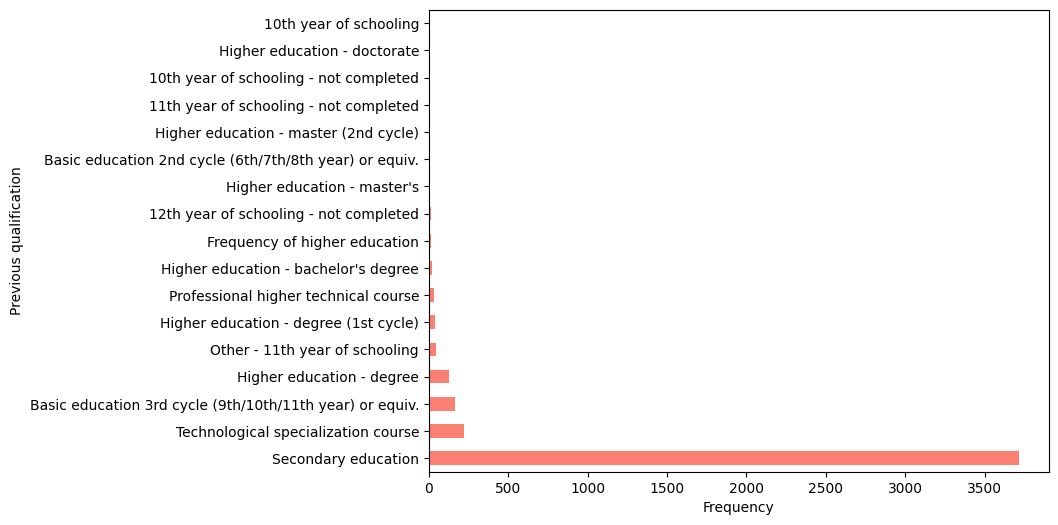

----------------------------------------------------------------------------------------------------
Target


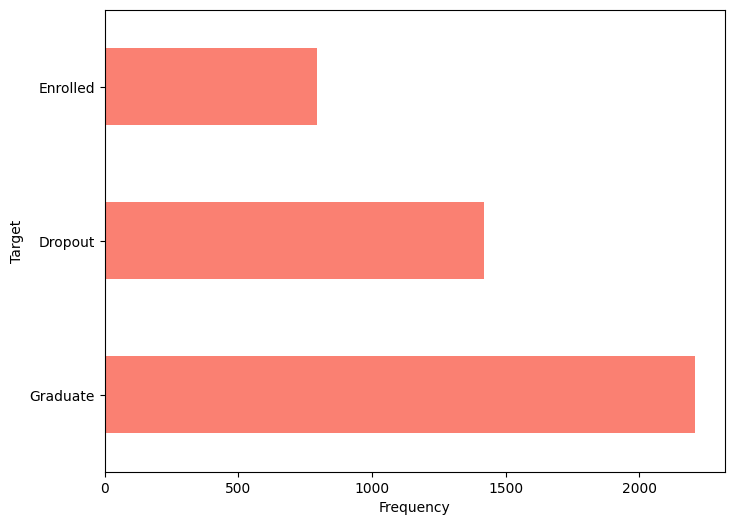

----------------------------------------------------------------------------------------------------


In [17]:
# For columns with data type as int64, object, we will visualize number of occurence for each value using bar plot
# Get columns with data types int64 and object
int_cols = list(set(df.select_dtypes(include=['int64']).columns) - set(numeric_columns))
object_cols = df.select_dtypes(include=['object']).columns

# Plot bar plots for int64 columns
for col in int_cols:
    print(col)
    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot(kind='barh', color='skyblue')
    plt.ylabel(col)
    plt.xlabel('Frequency')
    plt.show()
    print('-'*100)

# Plot bar plots for object columns
for col in object_cols:
    print(col)
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='barh', color='salmon')
    plt.ylabel(col)
    plt.xlabel('Frequency')
    plt.show()
    print('-'*100)

Continuous variables were examined using histogram plots, leading to the removal of highly skewed columns.  

Previous qualification (grade)


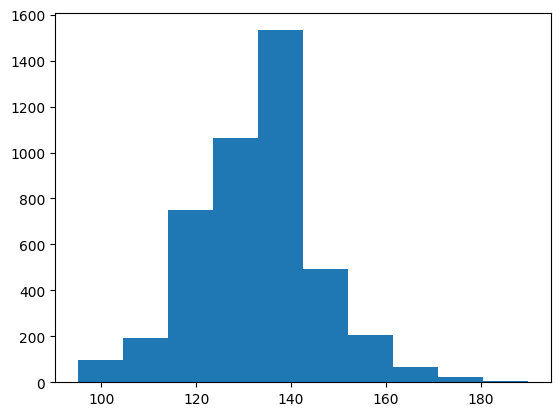

----------------------------------------------------------------------------------------------------
Admission grade


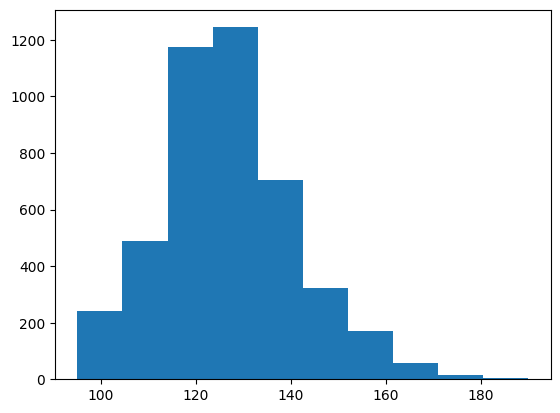

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (grade)


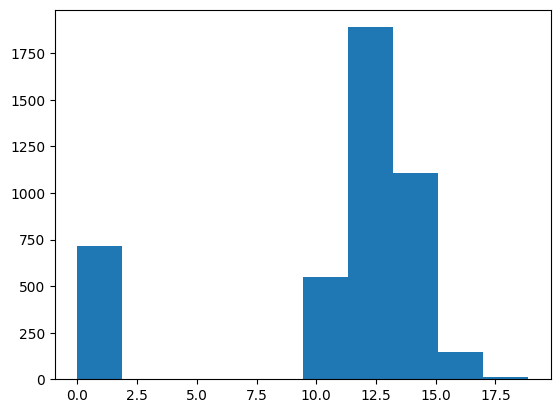

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (grade)


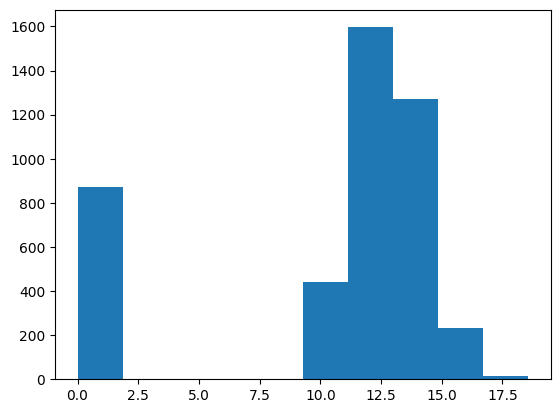

----------------------------------------------------------------------------------------------------
Age at enrollment


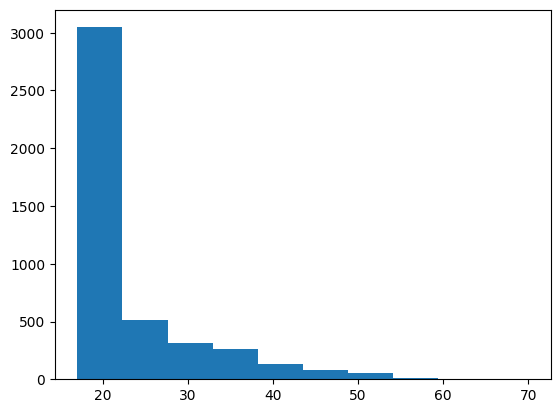

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (credited)


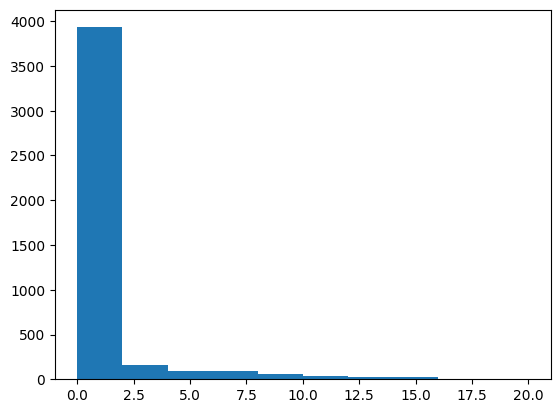

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (enrolled)


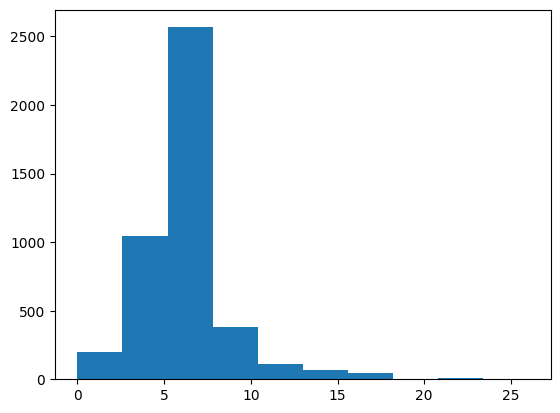

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (evaluations)


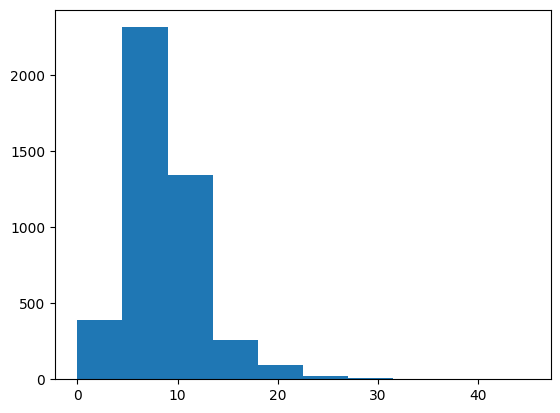

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (approved)


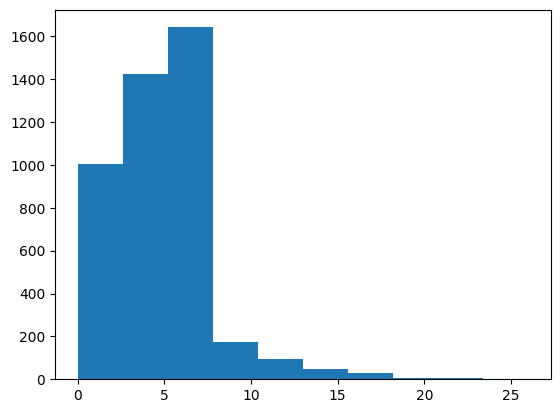

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (grade)


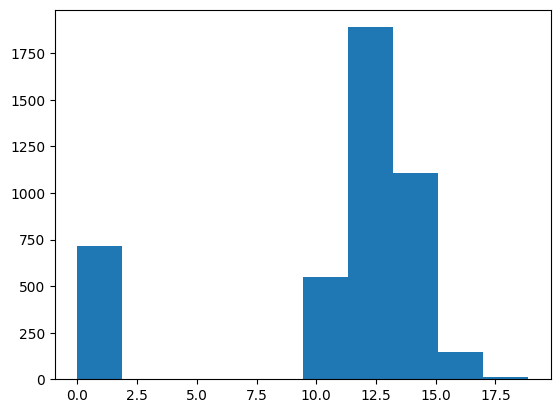

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (without evaluations)


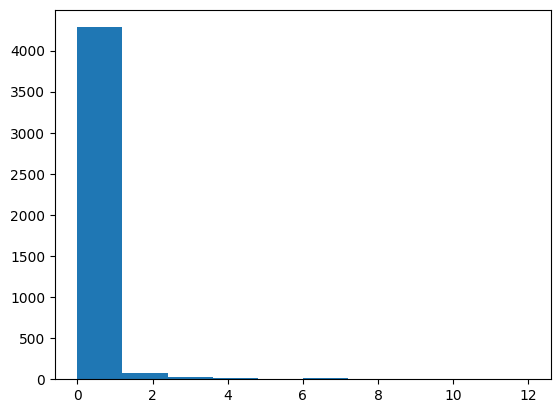

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (credited)


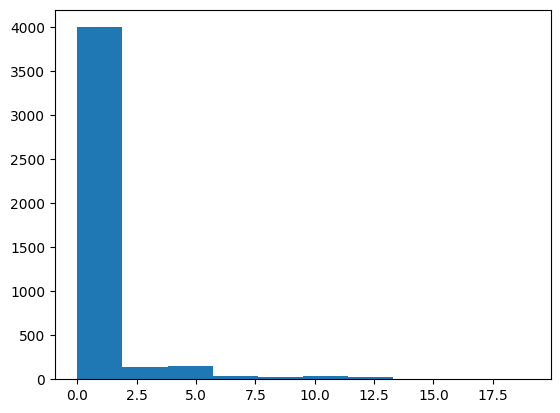

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (enrolled)


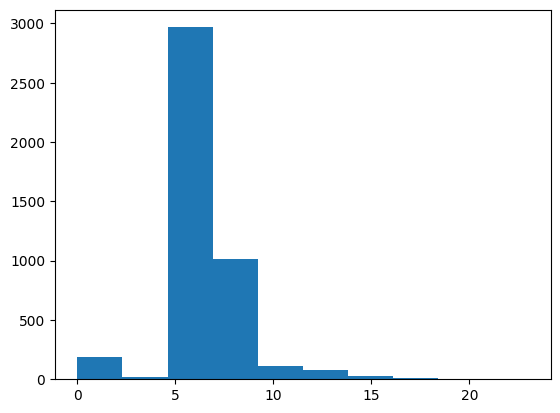

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (evaluations)


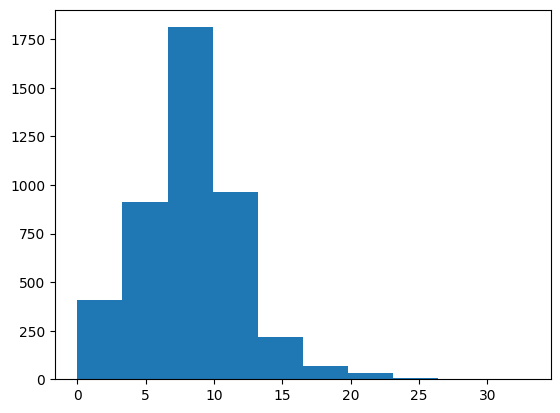

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (approved)


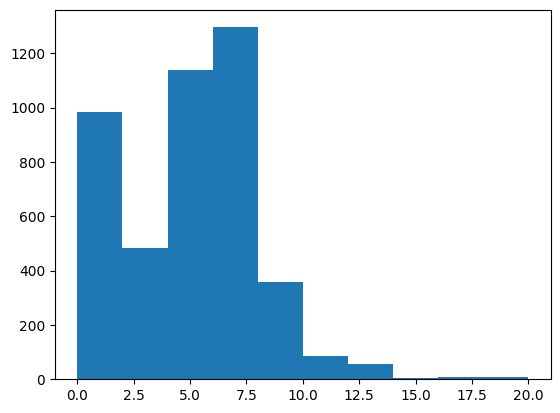

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (grade)


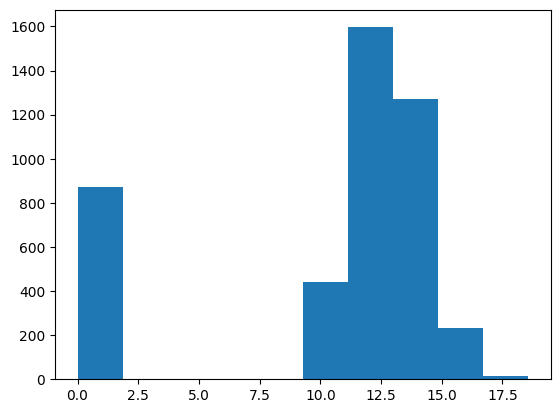

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (without evaluations)


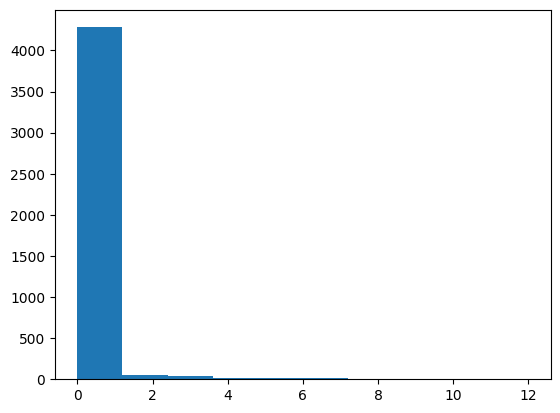

----------------------------------------------------------------------------------------------------


In [18]:
# for columns with data type as float64, we will use histogram plot to check the distribution
# for Previous qualification (grade), we need to check for each Previous qualification
# for columns with data type as int64, object, we will visualize number of occurence for each value using bar plot
# Get columns with data types int64 and object
float_cols = list(df.select_dtypes(include=['float64']).columns)

# Plot bar plots for int64 columns
for col in float_cols + numeric_columns:
    print(col)
    plt.hist(df[col])
    plt.show()
    print('-'*100)

**Drop columns that's too skewed**

In [19]:
drop_columns = ['Educational special needs', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)',
                'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)']

df.drop(drop_columns, axis=1, inplace=True)

In [20]:
# update numeric_columns list
numeric_columns = ['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)',
                   'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',]

**Remove outliers in continous columns**

Outliers in semester grade data were eliminated by capping values at 110, indicating that academic performance in the first year might be a significant factor in predicting student outcomes.

In [21]:
# Curricular units 1st sem (grade) <= 110
df = df[df['Curricular units 1st sem (grade)'] <= 110]
# Curricular units 2nd sem (grade) <= 110
df = df[df['Curricular units 2nd sem (grade)'] <= 110]

Lastly, I have a look at all remaining variables after cleansing.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marital status                          4424 non-null   object 
 1   Application mode                        4398 non-null   object 
 2   Application order                       4424 non-null   int64  
 3   Course                                  4424 non-null   object 
 4   Daytime/evening attendance	             4424 non-null   int64  
 5   Previous qualification                  4424 non-null   int64  
 6   Previous qualification (grade)          4424 non-null   float64
 7   Admission grade                         4424 non-null   float64
 8   Displaced                               4424 non-null   int64  
 9   Debtor                                  4424 non-null   int64  
 10  Tuition fees up to date                 4424 non-null   int6

#### For each target

The “Target” column was visualised in combination with other variables using bar plots to offer a comprehensive view of potential predictive relationships. This approach serves two primary purposes: firstly, it helps identify differences between classes across various features, highlighting those with strong predictive potential. Secondly, it allows for the selection of exemplar graphs showing significant disparities, which can serve as clear indicators of features likely to be most effective in predicting the target variable. This visual analysis aids in feature selection and provides intuitive insights into the dataset's structure and the relative importance of different variables in predicting student outcomes.

<Figure size 1500x2000 with 0 Axes>

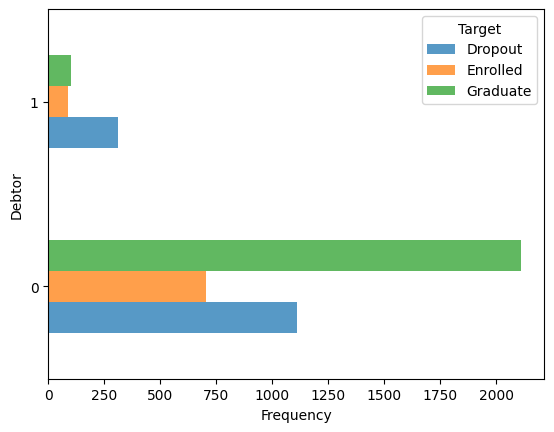

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

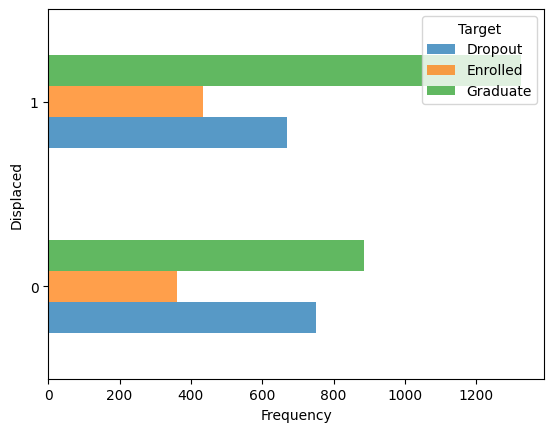

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

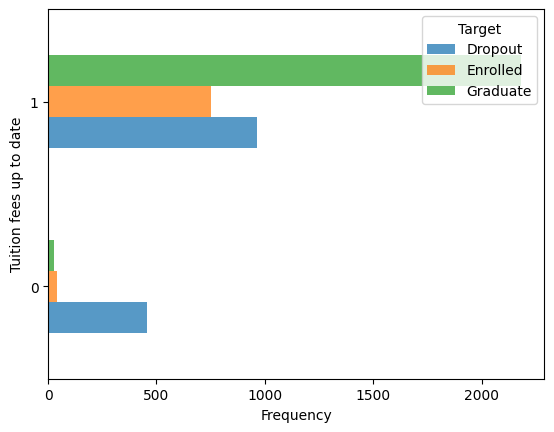

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


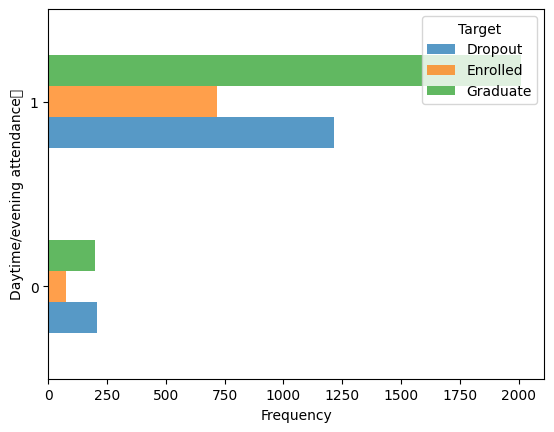

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

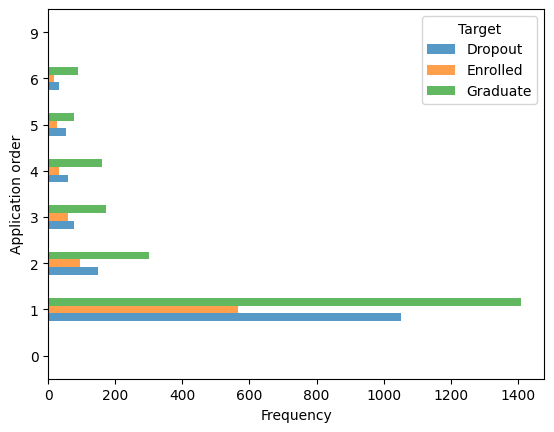

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

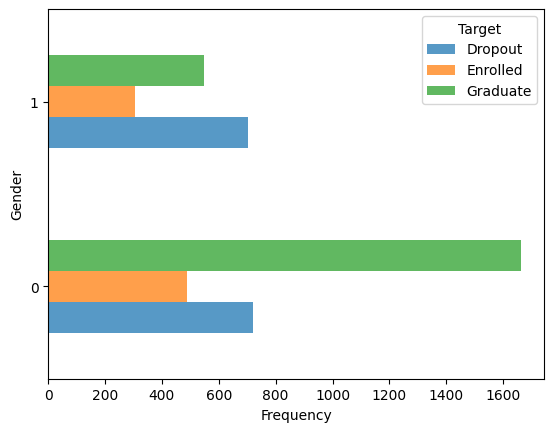

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

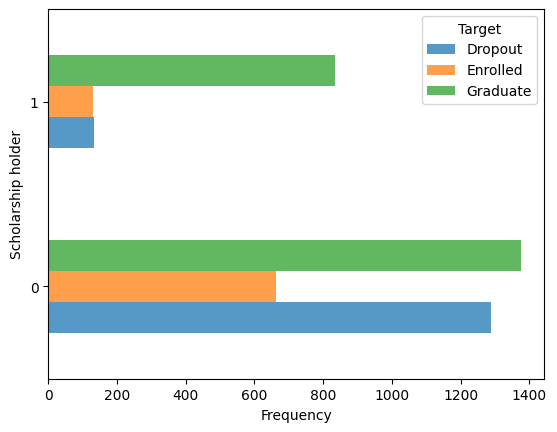

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

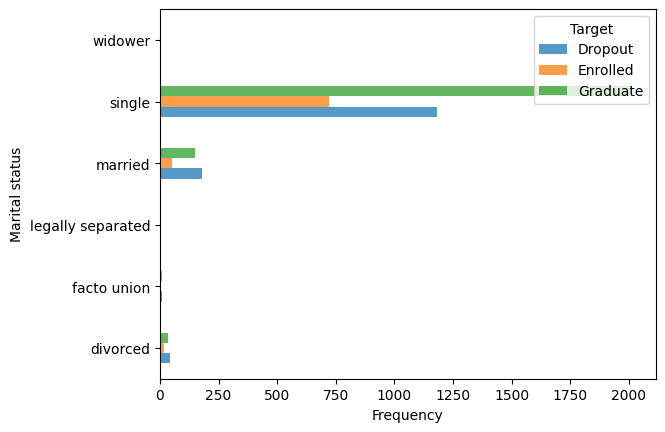

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

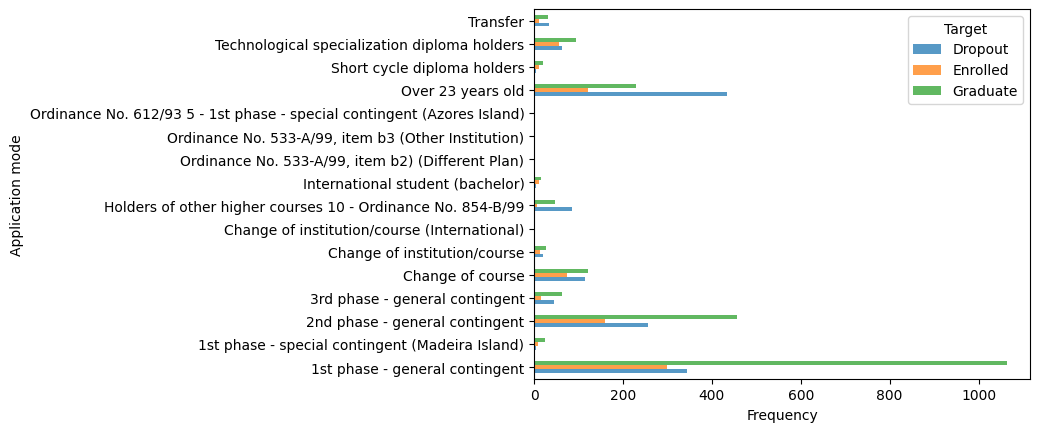

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

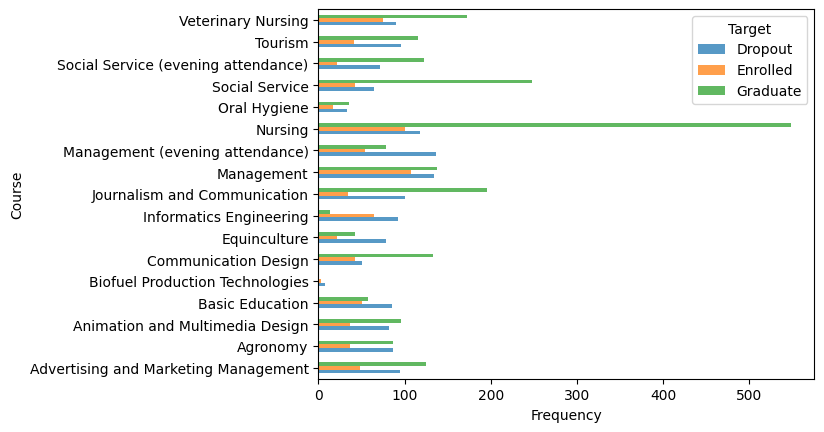

------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x2000 with 0 Axes>

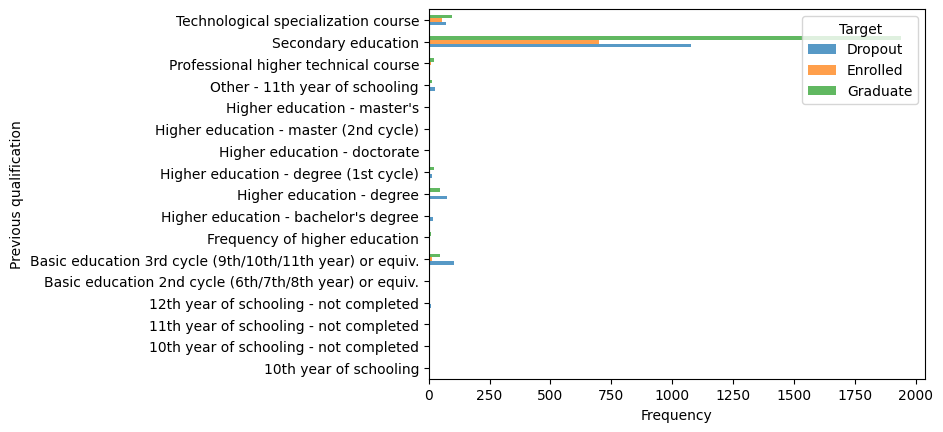

------------------------------------------------------------------------------------------------------------------------------------------------------


In [22]:
# For columns with data type as int64, object, we will visualize number of occurence for each value using bar plot
# Get columns with data types int64 and object
int_cols = list(set(df.select_dtypes(include=['int64']).columns) - set(numeric_columns))
object_cols = df.select_dtypes(include=['object']).columns

for col in list(int_cols) + list(object_cols):
    if col == 'Target':
        continue
    # Group by col and target, then count the transaction_id
    grouped = df.groupby([col, 'Target'])['Target'].count().unstack()

    # Create a clustered column chart
    plt.figure(figsize=(15, 20))
    grouped.plot(kind='barh', stacked=False, alpha=0.75)
    plt.ylabel(col)
    plt.xlabel('Frequency')
    plt.legend(title='Target', loc='upper right')
    plt.show()
    print('-'*150)

Debtor


<Figure size 1200x800 with 0 Axes>

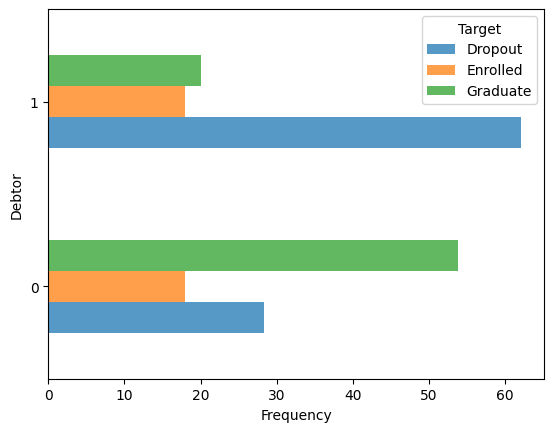

------------------------------------------------------------------------------------------------------------------------------------------------------
Displaced


<Figure size 1200x800 with 0 Axes>

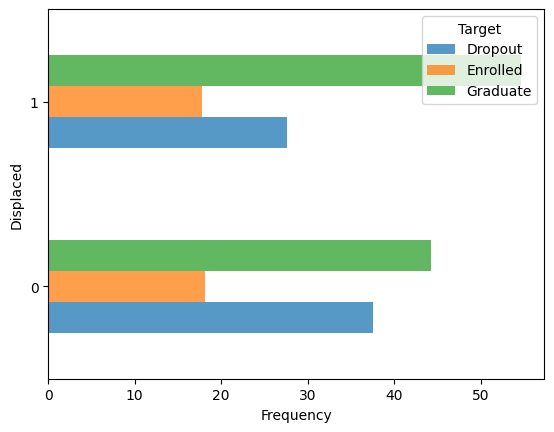

------------------------------------------------------------------------------------------------------------------------------------------------------
Tuition fees up to date


<Figure size 1200x800 with 0 Axes>

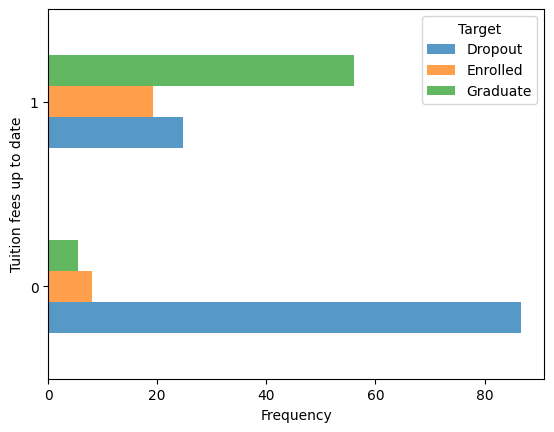

------------------------------------------------------------------------------------------------------------------------------------------------------
Daytime/evening attendance	


<Figure size 1200x800 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


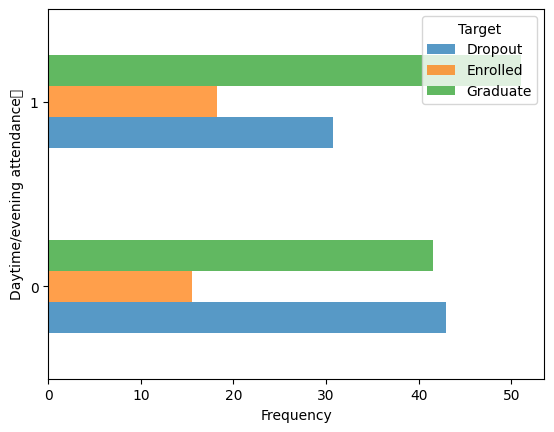

------------------------------------------------------------------------------------------------------------------------------------------------------
Application order


<Figure size 1200x800 with 0 Axes>

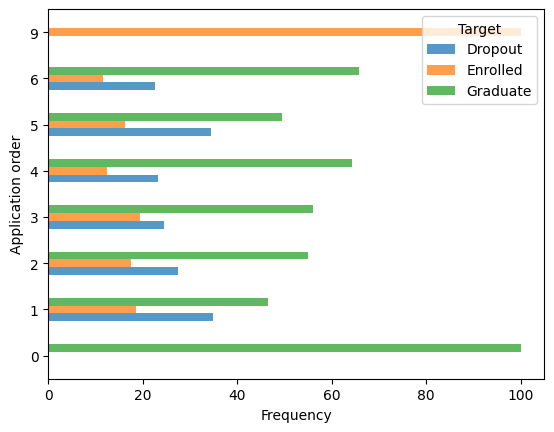

------------------------------------------------------------------------------------------------------------------------------------------------------
Gender


<Figure size 1200x800 with 0 Axes>

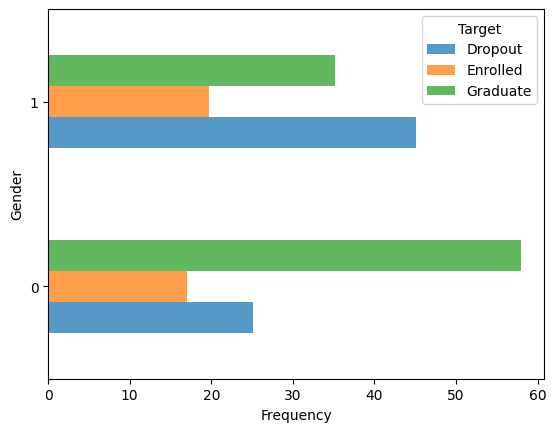

------------------------------------------------------------------------------------------------------------------------------------------------------
Scholarship holder


<Figure size 1200x800 with 0 Axes>

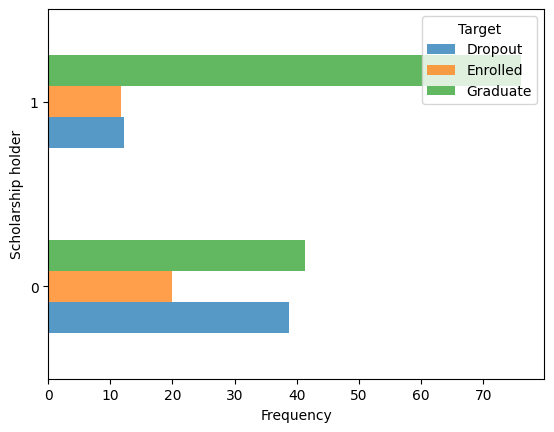

------------------------------------------------------------------------------------------------------------------------------------------------------
Marital status


<Figure size 1200x800 with 0 Axes>

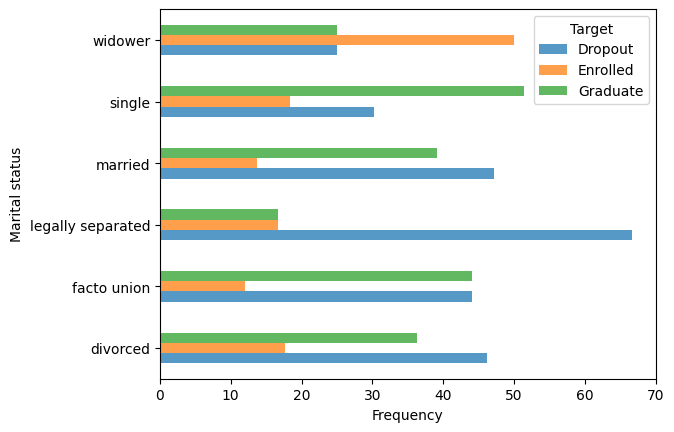

------------------------------------------------------------------------------------------------------------------------------------------------------
Application mode


<Figure size 1200x800 with 0 Axes>

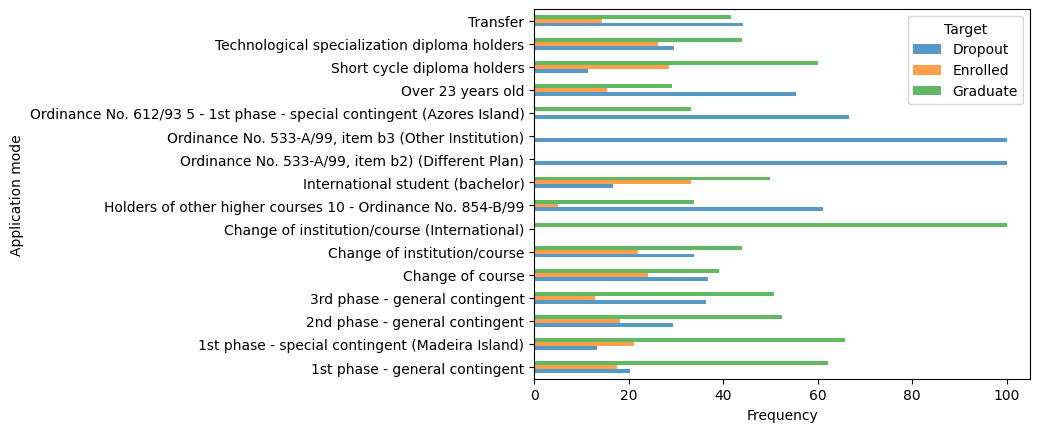

------------------------------------------------------------------------------------------------------------------------------------------------------
Course


<Figure size 1200x800 with 0 Axes>

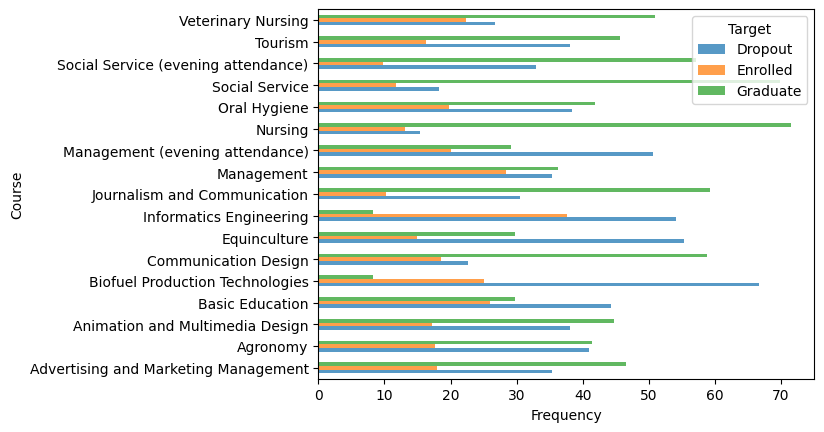

------------------------------------------------------------------------------------------------------------------------------------------------------
Previous qualification


<Figure size 1200x800 with 0 Axes>

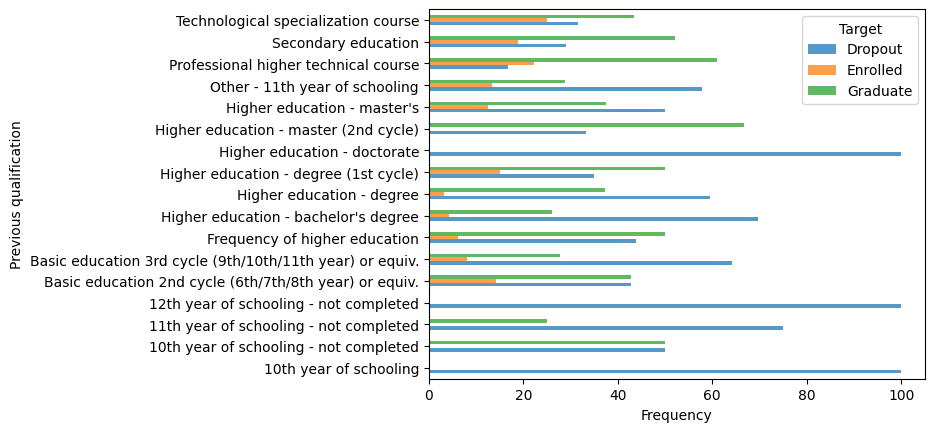

------------------------------------------------------------------------------------------------------------------------------------------------------


In [23]:
for col in list(int_cols) + list(object_cols):
    if col == 'Target':
        continue
    print(col)
    # Group by col and target, then count the transaction_id
    grouped = df.groupby([col, 'Target'])['Target'].count().unstack()
    grouped['all'] = grouped.sum(axis=1)
    for target in grouped.columns:
        grouped[target] = round(grouped[target] * 100 / grouped['all'], 1)
    grouped.drop('all', axis=1, inplace=True)

    # Create a clustered column chart
    plt.figure(figsize=(12, 8))
    grouped.plot(kind='barh', stacked=False, alpha=0.75)
    plt.ylabel(col)
    plt.xlabel('Frequency')
    plt.legend(title='Target', loc='upper right')
    plt.show()
    print('-'*150)

Previous qualification (grade)


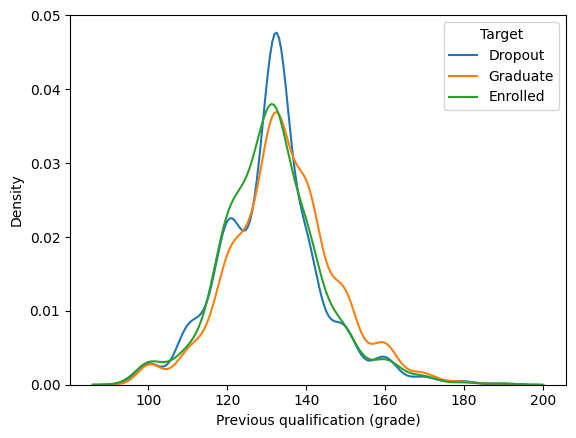

----------------------------------------------------------------------------------------------------
Admission grade


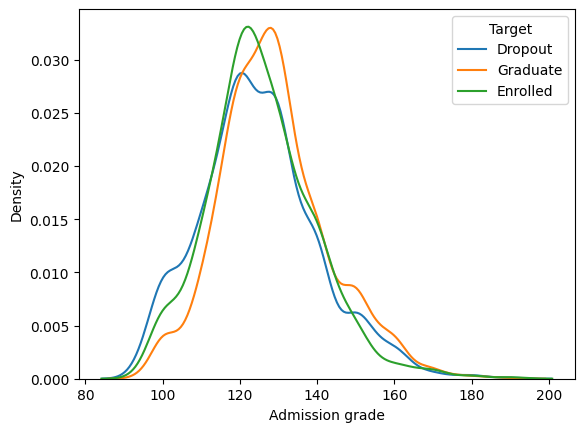

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (grade)


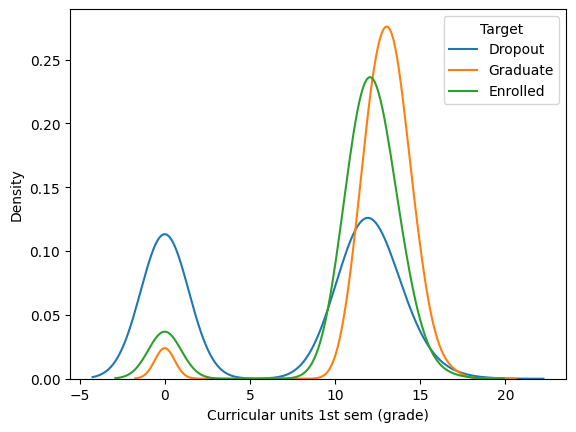

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (grade)


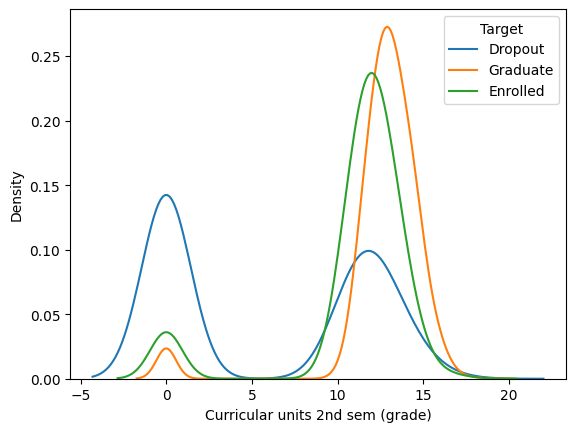

----------------------------------------------------------------------------------------------------
Age at enrollment


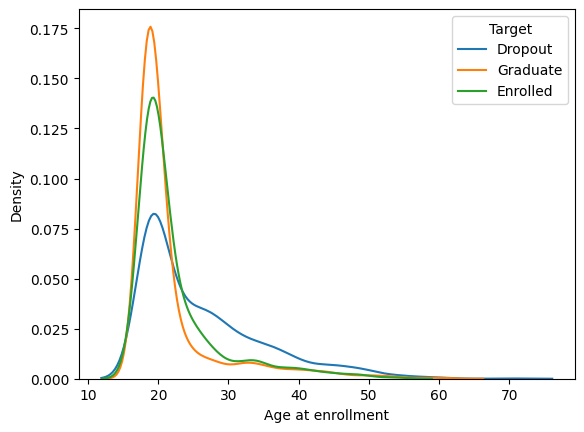

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (enrolled)


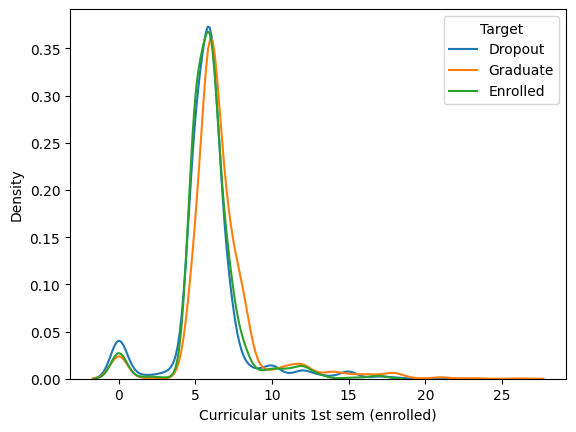

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (evaluations)


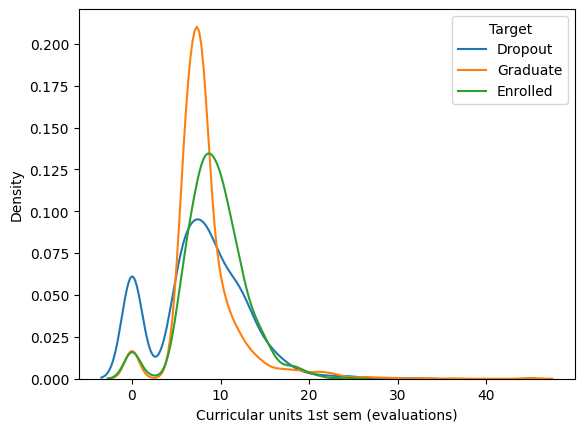

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (approved)


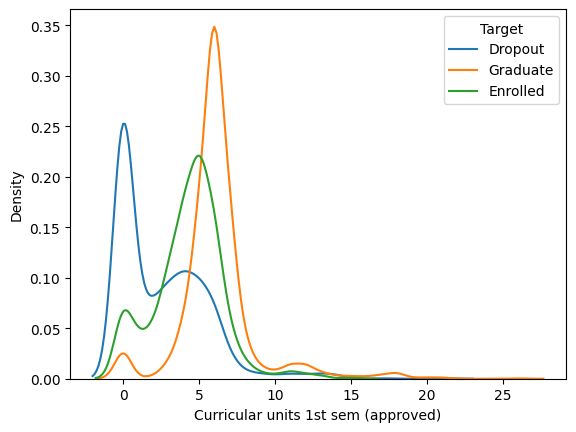

----------------------------------------------------------------------------------------------------
Curricular units 1st sem (grade)


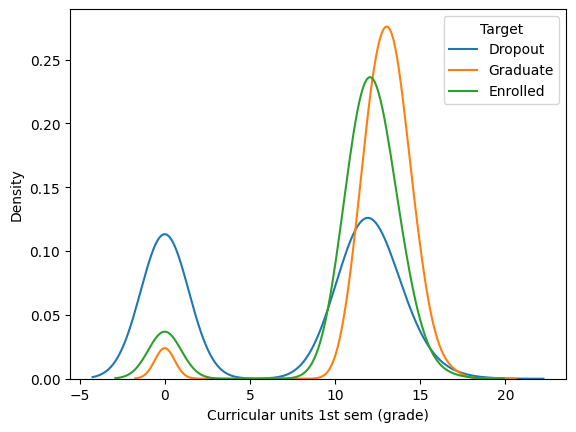

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (enrolled)


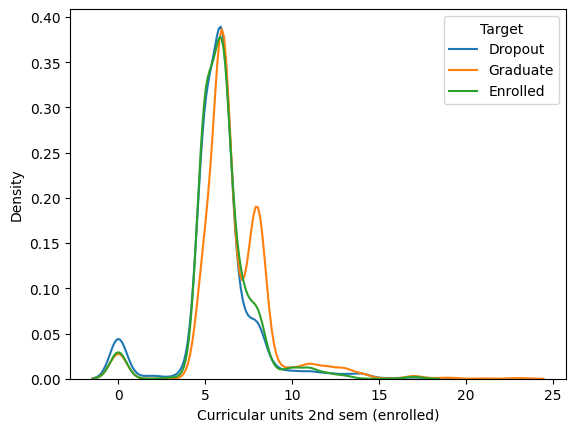

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (evaluations)


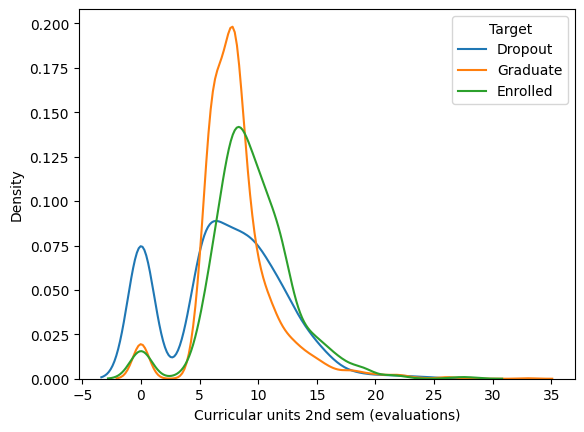

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (approved)


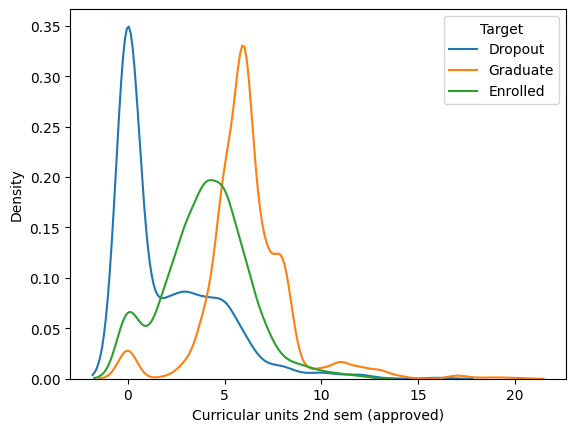

----------------------------------------------------------------------------------------------------
Curricular units 2nd sem (grade)


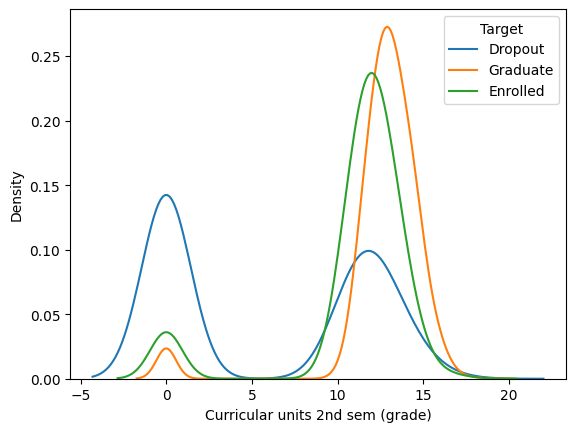

----------------------------------------------------------------------------------------------------


In [24]:
# For columns with data type as float64, we will use histogram plot to check the distribution
# For Previous qualification (grade), we need to check for each Previous qualification
# For columns with data type as int64, object, we will visualize number of occurence for each value using bar plot
# Get columns with data types int64 and object
float_cols = list(df.select_dtypes(include=['float64']).columns)

# Plot bar plots for int64 columns
for col in float_cols + numeric_columns:
    print(col)
    for target in df.Target.unique():
        sns.kdeplot(df[df['Target'] == target][col], label=target)
    plt.legend(title='Target', loc='upper right')
    plt.show()
    print('-'*100)

## Build ML model

In [42]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

#### Variable transformation

In the data preparation phase, normalisation of categorical data types was performed to convert them into corresponding numerical formats. The “Target” column was processed using label encoding, while the previous qualification column, which exhibited an inherent ordinal structure, was divided into groups using a mapping approach (e.g., 1 for Secondary education, 2 for Higher education, and so on). For other categorical variables without a natural order, one-hot encoding was applied to create binary representations. These steps ensured that all categorical data was appropriately transformed for use in machine learning algorithms.

In [26]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [27]:
# mapping values in 'Previous qualification' column into group
def mapping_previous_qualification(x):
    if x in ['Basic education 2nd cycle (6th/7th/8th year) or equiv.', 'Secondary education']:
        return 0
    elif x in ['10th year of schooling - not completed', '10th year of schooling', '11th year of schooling - not completed',
               'Other - 11th year of schooling', '12th year of schooling - not completed', 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
               'Professional higher technical course', 'Technological specialization course', 'Frequency of higher education']:
        return 1
    elif x in ["Higher education - bachelor's degree", 'Higher education - degree (1st cycle)', 'Higher education - degree']:
        return 2
    else:
        return 3

df['Previous qualification'] = df['Previous qualification'].apply(mapping_previous_qualification)

In [28]:
# Transform object columns by onehot encoding
object_cols = df.select_dtypes(include=['object']).columns
dummy_df = pd.get_dummies(df[object_cols]).astype(int)
# Data for training and testing
data = pd.concat([df.drop(object_cols, axis=1), dummy_df], axis=1)

In [54]:
data = data.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '', x.title()))


#### Training model

Subsequently, the dataset was partitioned into training and testing subsets, with an 80-20 split respectively. This strategic division provided a substantial amount of data for model training while reserving a sufficient portion for validation. To further prepare the data for modelling, a Min-Max scaler was applied to normalise all features to a 0-1 range. This scaling process helps to standardise the range of independent variables, preventing features with larger magnitudes from dominating the learning process. These preparatory steps collectively aim to optimise the model's predictive capabilities while mitigating the risk of overfitting, thus ensuring a robust evaluation of model performance on unseen data.

In [30]:
# Train test split
X, y = data.drop(['Target'], axis=1), data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = MinMaxScaler()
# Scale data
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
# Transform on X_test
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

In this report, various machine learning classification techniques were explored to identify optimal predictive models for student outcomes. The primary objective was to evaluate and compare the performance metrics of different classifiers to determine the most effective approach. To enhance model performance, hyperparameters were fine-tuned using the grid search technique, a widely adopted method for identifying the most suitable parameter configurations across the selected algorithms.

In [32]:
# Define the classifiers
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
lgbm_classifier = LGBMClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Define parameter grids for GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 8, 10]
}

xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 8, 10]
}

lgbm_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 8, 10]
}

knn_param_grid = {
    'n_neighbors': [4, 6, 8],
    'weights': ['uniform', 'distance']
}

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with each classifier
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=skf, scoring='f1_micro')
rf_grid_search.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=skf, scoring='f1_micro')
xgb_grid_search.fit(X_train, y_train)

lgbm_grid_search = GridSearchCV(lgbm_classifier, lgbm_param_grid, cv=skf, scoring='f1_micro')
lgbm_grid_search.fit(X_train, y_train)

knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=skf, scoring='f1_micro')
knn_grid_search.fit(X_train, y_train)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 6, 8],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro')

After this step, I can see the best parameters and best scores for each classifier.

In [33]:
# Print best parameters and best scores for each classifier
print("Random Forest - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest - Best Score:", rf_grid_search.best_score_)

print("XGBoost - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost - Best Score:", xgb_grid_search.best_score_)

print("LightGBM - Best Parameters:", lgbm_grid_search.best_params_)
print("LightGBM - Best Score:", lgbm_grid_search.best_score_)

print("KNN - Best Parameters:", knn_grid_search.best_params_)
print("KNN - Best Score:", knn_grid_search.best_score_)

Random Forest - Best Parameters: {'max_depth': 10, 'n_estimators': 500}
Random Forest - Best Score: 0.7750789122495785
XGBoost - Best Parameters: {'max_depth': 6, 'n_estimators': 100}
XGBoost - Best Score: 0.7643412525271898
LightGBM - Best Parameters: {'max_depth': 6, 'n_estimators': 100}
LightGBM - Best Score: 0.7728190252439288
KNN - Best Parameters: {'n_neighbors': 8, 'weights': 'uniform'}
KNN - Best Score: 0.6719408018283668


## Evaluation

Using metrics such as Accuracy, Precision, Recall, F1-score to evaluate all classifiers.

In [34]:
# Get predictions on the test data
rf_pred = rf_grid_search.predict(X_test)
xgb_pred = xgb_grid_search.predict(X_test)
lgbm_pred = lgbm_grid_search.predict(X_test)
knn_pred = knn_grid_search.predict(X_test)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       316
           1       0.52      0.25      0.33       151
           2       0.75      0.95      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.65      0.65       885
weighted avg       0.74      0.76      0.73       885



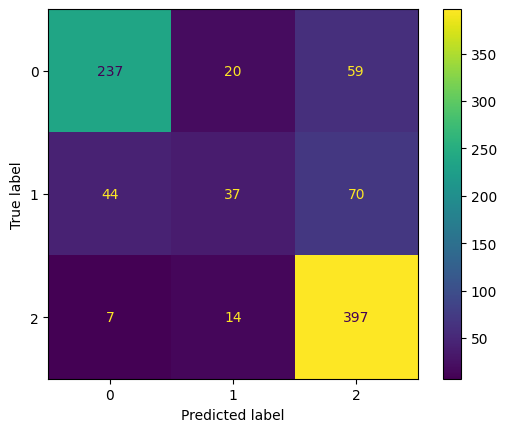

In [43]:
# Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       316
           1       0.43      0.34      0.38       151
           2       0.80      0.91      0.85       418

    accuracy                           0.75       885
   macro avg       0.68      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885



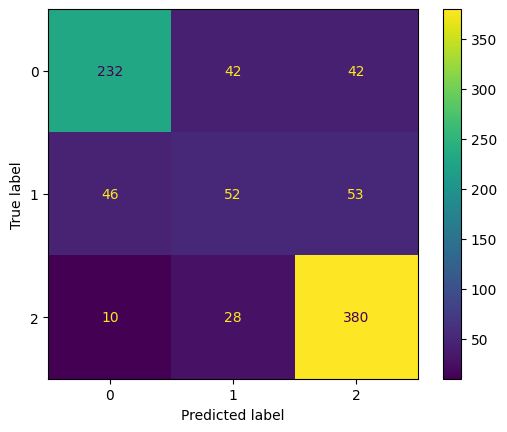

In [44]:
# XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred)

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       316
           1       0.42      0.32      0.37       151
           2       0.78      0.89      0.83       418

    accuracy                           0.74       885
   macro avg       0.67      0.65      0.66       885
weighted avg       0.73      0.74      0.73       885



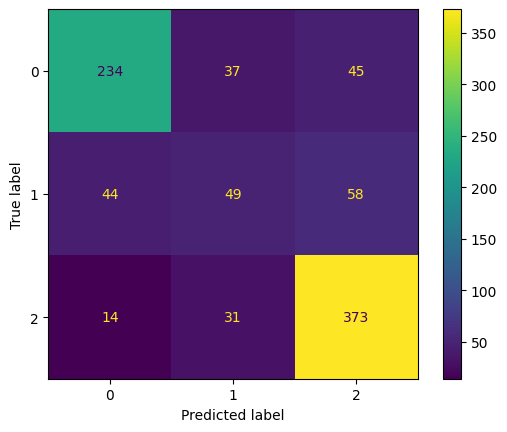

In [45]:
# LightGBM
print("LightGBM Classification Report:")
print(classification_report(y_test, lgbm_pred))
ConfusionMatrixDisplay.from_predictions(y_test, lgbm_pred)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.59      0.66       316
           1       0.35      0.26      0.30       151
           2       0.69      0.88      0.77       418

    accuracy                           0.67       885
   macro avg       0.60      0.58      0.58       885
weighted avg       0.66      0.67      0.65       885



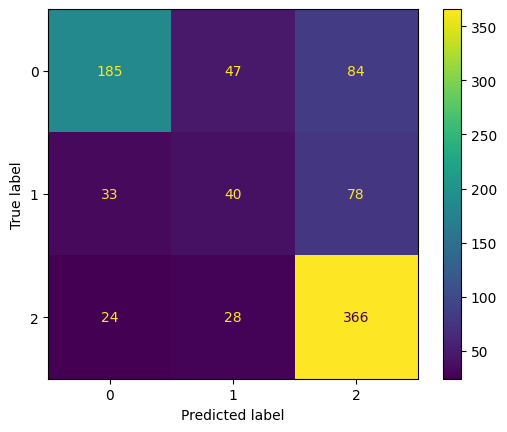

In [46]:
# KNN
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)

A comprehensive evaluation of all implemented classifiers revealed that the K-Nearest Neighbors (KNN) algorithm exhibited the weakest performance across key metrics. In contrast, the Light Gradient Boosting Machine (LightGBM) emerged as the most robust classifier, consistently outperforming other models in terms of accuracy, precision, recall, and F1-score.

Next, in analysing the performance of the four classifiers through their confusion matrices, we observe varied predictive abilities. For instance, the XGBoost classifier and Random Forest classifier exhibits a strong predictive accuracy for true negatives, suggesting a high capability to correctly identify students who will continue their studies. Each matrix has three classes (0, 1 and 2) and provides nine pieces of information. These matrices are key in evaluating the classification performance of the different models.

## Feature Importances

The table presents all feature importances in descending order.

In [39]:
# Feature importances in LightGBM model
# Get feature importances
feature_importances = lgbm_grid_search.best_estimator_.feature_importances_
feature_names = lgbm_grid_search.best_estimator_.feature_name_

feature_importance_table = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the table by feature importance
feature_importance_table = feature_importance_table.sort_values(by='Importance', ascending=False)
feature_importance_table


,Feature,Importance
4,AdmissionGrade,931
18,CurricularUnits2NdSemGrade,763
3,PreviousQualificationGrade,697
14,CurricularUnits1StSemGrade,695
17,CurricularUnits2NdSemApproved,576
10,AgeAtEnrollment,549
16,CurricularUnits2NdSemEvaluations,470
13,CurricularUnits1StSemApproved,379
12,CurricularUnits1StSemEvaluations,371
11,CurricularUnits1StSemEnrolled,219


The plot below shows the top 30 feature importances.

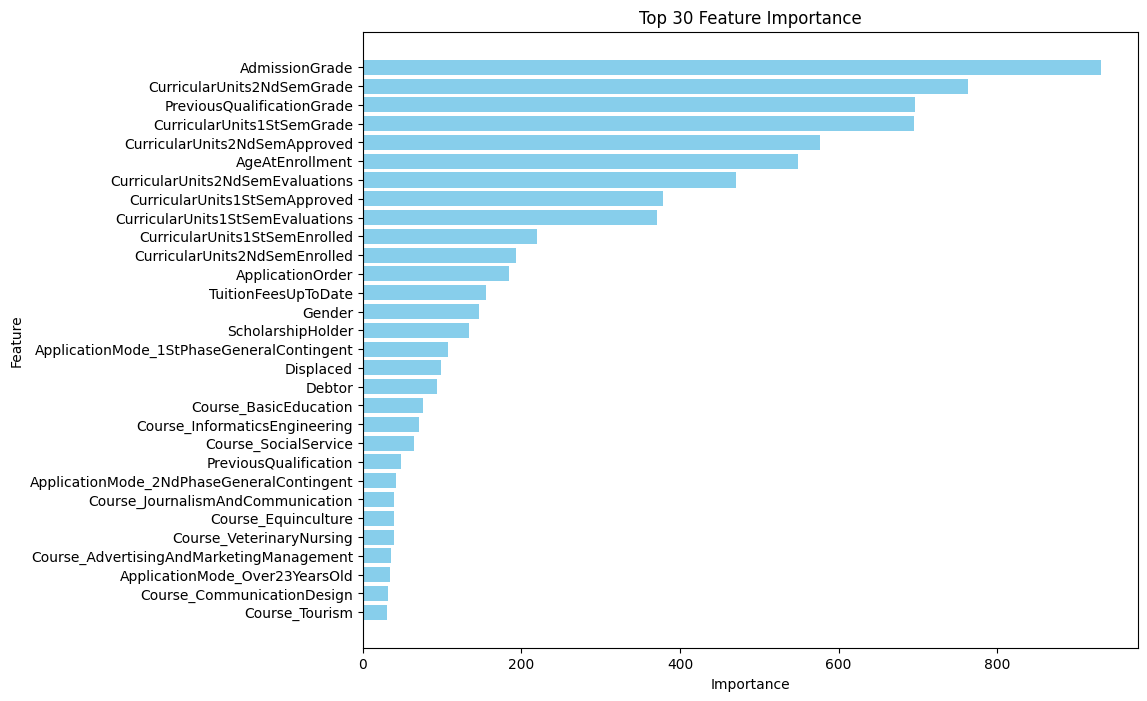

In [52]:
import matplotlib.pyplot as plt

# Assuming 'feature_importance_table' is your DataFrame with columns 'Feature' and 'Importance'
# Sort the DataFrame by 'Importance' in descending order and select the top 15 features
top_30_features = feature_importance_table.sort_values(by='Importance', ascending=False).head(30)

# Plotting the bar chart for the top 15 features
plt.figure(figsize=(10, 8))
plt.barh(top_30_features['Feature'], top_30_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


Based on this graph, we can conclude which features strongly influence the prediction process. According to this plot, the “Admission grade” and “Previous Qualification Grade” emerged as primary predictors of the target outcome for the LightGBM Classifier. Additionally, the grades obtained in Curricular Units during both the first and second semesters demonstrated substantial impact on predicting student dropout. These findings highlight the importance of academic performance, both prior to and during university enrolment, in determining a student's likelihood of completing their degree program.